## Test notebook to check FC extractors

- Takes output of `nipoppy/extractors/fmriprep/run_FC.py` e.g.  `sub-MNI0056_ses-01_task-rest_space-MNI152NLin2009cAsym_res-2_FC_schaefer_100.npy`


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nilearn
import pandas as pd
import seaborn as sns

### Paths

In [8]:
extraction_dir = "/home/md_lab/Analysis/ylopd_func_network/FC/output/"

### Load data for single subject

In [9]:
participant_id = "sub-YLOPD03"
session = "ses-01"
space_res = "MNI152NLin2009cAsym_res-2"
task = "rest"
parcellation = "schaefer_100"
connectivity_type = "correlation"

# Load the data
data = np.load(f"{extraction_dir}/{participant_id}/{session}/{participant_id}_{session}_task-{task}_space-{space_res}_FC_{parcellation}.npy",
               allow_pickle=True).item()

# Get the ROI labels
roi_labels = [rl.decode("utf-8") for rl in data["roi_labels"]]
n_roi_labels = len(roi_labels)
print(f"number of ROI labels: {n_roi_labels}")

# Create connectome_df
connectome_df = pd.DataFrame(data[connectivity_type], columns=roi_labels, index=roi_labels)
print(f"connectome_df shape: {connectome_df.shape}")

number of ROI labels: 100
connectome_df shape: (100, 100)


### Plot the correlation matrix


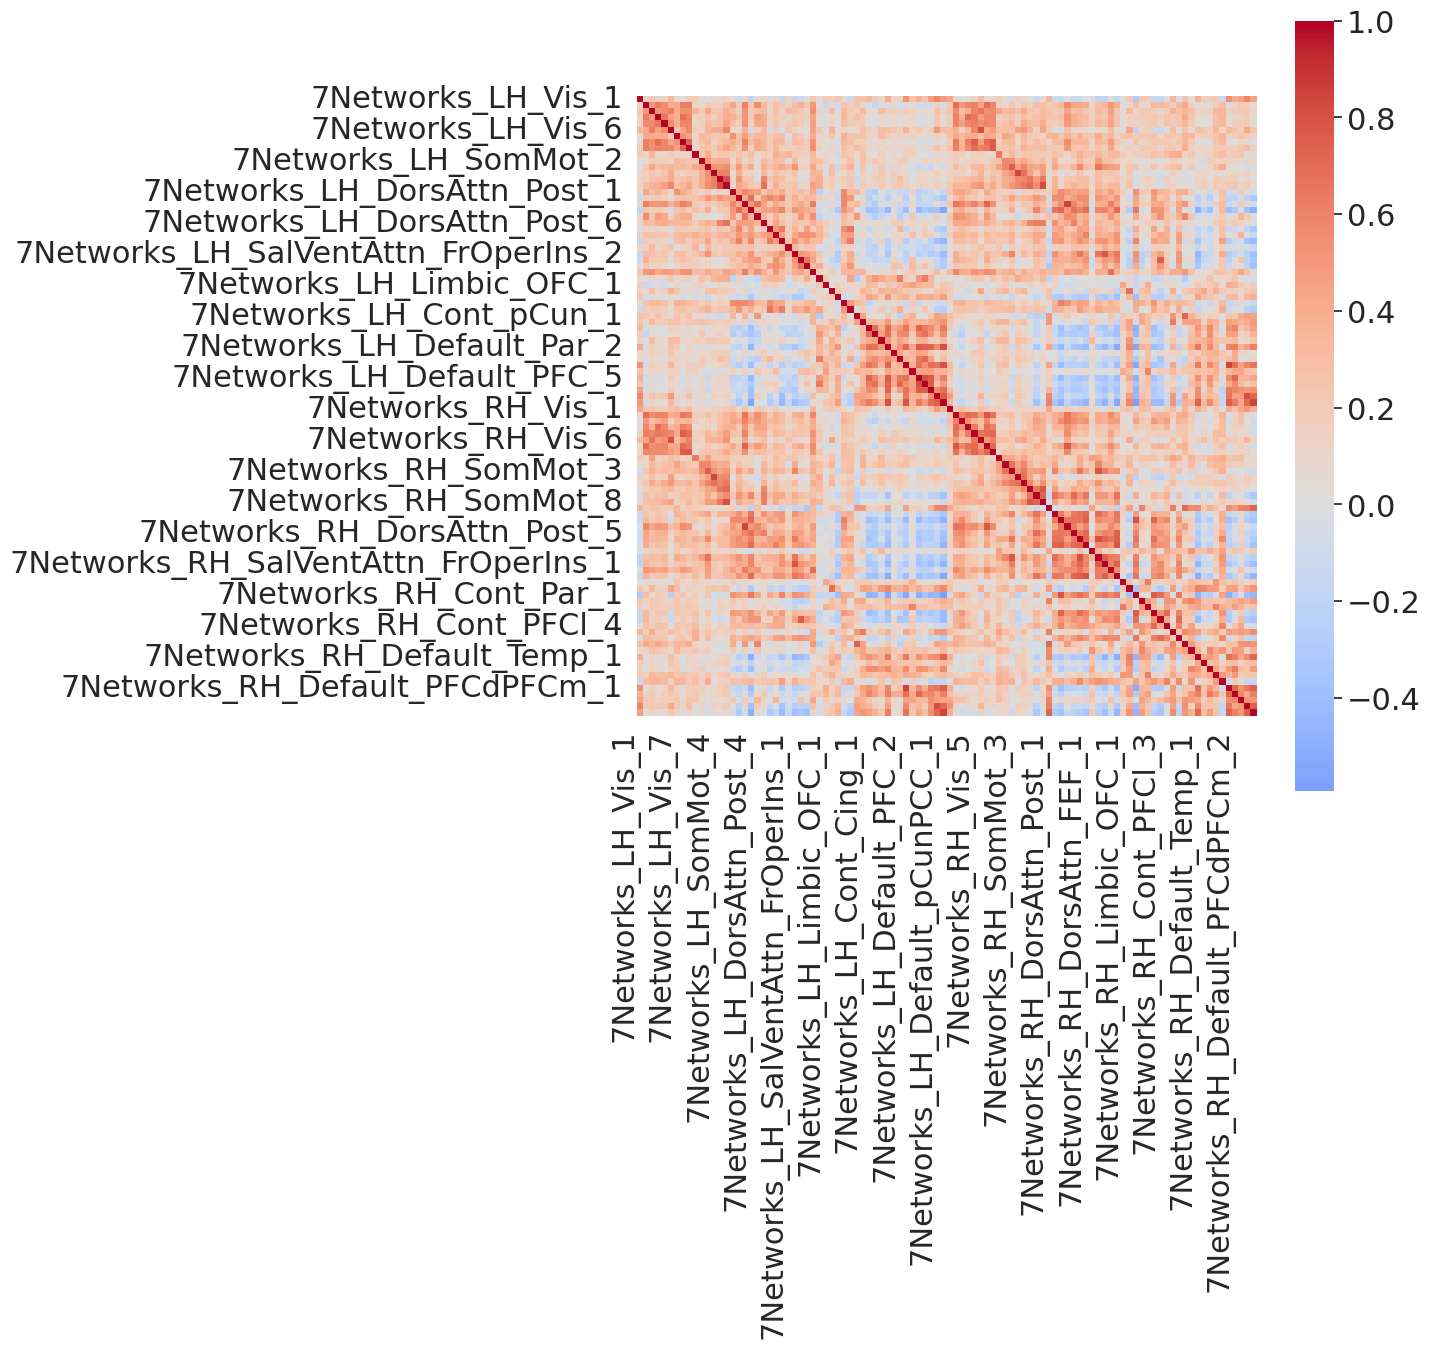

In [11]:
plot_df = connectome_df.copy()
sns.set(font_scale=2)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(plot_df, square=True, cmap="coolwarm", center=0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right')
    plt.show()